In [39]:
import pandas as pd
import sqlite3

In [40]:
orders = pd.read_csv("C:/Users/samiksha/Downloads/orders.csv")
orders.head()

,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name
0,1,2508,450,18-02-2023,842.97,New Foods Chinese
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian


In [41]:
users=pd.read_json("C:/Users/samiksha/Downloads/users.json")
users.head()

,user_id,name,city,membership
0,1,User_1,Chennai,Regular
1,2,User_2,Pune,Gold
2,3,User_3,Bangalore,Gold
3,4,User_4,Bangalore,Regular
4,5,User_5,Pune,Gold


In [42]:
import sqlite3

conn = sqlite3.connect("restaurants.db")
cursor = conn.cursor()

cursor.execute("DROP TABLE IF EXISTS restaurants;")
conn.commit()

with open("C:/Users/samiksha/Downloads/restaurants.sql","r") as file:
    sql_script = file.read()

cursor.executescript(sql_script)
conn.commit()


In [43]:
restaurants=pd.read_sql_query("SELECT * FROM restaurants",conn)
restaurants.head()

,restaurant_id,restaurant_name,cuisine,rating
0,1,Restaurant_1,Chinese,4.8
1,2,Restaurant_2,Indian,4.1
2,3,Restaurant_3,Mexican,4.3
3,4,Restaurant_4,Chinese,4.1
4,5,Restaurant_5,Chinese,4.8


In [44]:
print(orders.shape,users.shape,restaurants.shape)

(10000, 6) (3000, 4) (500, 4)


In [45]:
orders.columns
users.columns
restaurants.columns

Index(['restaurant_id', 'restaurant_name', 'cuisine', 'rating'], dtype='object')

In [46]:
merged_df=orders.merge(users,on="user_id",how="left")

In [47]:
final_df=merged_df.merge(restaurants,on="restaurant_id",how="left")

In [48]:
final_df.head()

,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name_x,name,city,membership,restaurant_name_y,cuisine,rating
0,1,2508,450,18-02-2023,842.97,New Foods Chinese,User_2508,Hyderabad,Regular,Restaurant_450,Mexican,3.2
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine,User_2693,Pune,Regular,Restaurant_309,Indian,4.5
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi,User_2084,Chennai,Gold,Restaurant_107,Mexican,4.0
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg,User_319,Bangalore,Gold,Restaurant_224,Chinese,4.8
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian,User_1064,Pune,Regular,Restaurant_293,Italian,3.0


In [49]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_id           10000 non-null  int64  
 1   user_id            10000 non-null  int64  
 2   restaurant_id      10000 non-null  int64  
 3   order_date         10000 non-null  object 
 4   total_amount       10000 non-null  float64
 5   restaurant_name_x  10000 non-null  object 
 6   name               10000 non-null  object 
 7   city               10000 non-null  object 
 8   membership         10000 non-null  object 
 9   restaurant_name_y  10000 non-null  object 
 10  cuisine            10000 non-null  object 
 11  rating             10000 non-null  float64
dtypes: float64(2), int64(3), object(7)
memory usage: 937.6+ KB


In [50]:
final_df.to_csv("final_food_delivery_dataset.csv",index=False)

In [51]:
final_df.drop(columns=['restaurant_name_x'], inplace=True)
final_df.rename(columns={'restaurant_name_y': 'restaurant_name'}, inplace=True)


In [52]:
#Order Trends Over Time
final_df['order_date'] = pd.to_datetime(final_df['order_date'])

final_df.groupby(
    final_df['order_date'].dt.month
).size()


C:\Users\samiksha\AppData\Local\Temp\ipykernel_31824\2038016229.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  final_df['order_date'] = pd.to_datetime(final_df['order_date'])


order_date
1     831
2     785
3     903
4     812
5     844
6     784
7     859
8     851
9     812
10    863
11    807
12    849
dtype: int64

In [53]:
#User Behavior Patterns
final_df.groupby("user_id")["order_id"].count().sort_values(ascending=False)


user_id
2973    13
1515    12
496     11
874     11
1337    11
        ..
2961     1
2957     1
2951     1
1276     1
1272     1
Name: order_id, Length: 2883, dtype: int64

In [54]:
final_df[final_df['membership'] == 'Gold'] \
    .groupby('city')['total_amount'] \
    .sum() \
    .sort_values(ascending=False)


city
Chennai      1080909.79
Pune         1003012.32
Bangalore     994702.59
Hyderabad     896740.19
Name: total_amount, dtype: float64

In [55]:
final_df.columns


Index(['order_id', 'user_id', 'restaurant_id', 'order_date', 'total_amount',
       'name', 'city', 'membership', 'restaurant_name', 'cuisine', 'rating'],
      dtype='object')

In [56]:
final_df.groupby('cuisine')['total_amount'] \
        .mean() \
        .sort_values(ascending=False)


cuisine
Mexican    808.021344
Italian    799.448578
Indian     798.466011
Chinese    798.389020
Name: total_amount, dtype: float64

In [57]:
user_spend = final_df.groupby('user_id')['total_amount'].sum()

user_spend[user_spend > 1000].count()


np.int64(2544)

In [58]:
final_df['rating_range'] = pd.cut(
    final_df['rating'],
    bins=[0, 3.5, 4.0, 4.5, 5.0],
    labels=['3.0–3.5', '3.6–4.0', '4.1–4.5', '4.6–5.0']
)

final_df.groupby('rating_range')['total_amount'] \
        .sum() \
        .sort_values(ascending=False)


C:\Users\samiksha\AppData\Local\Temp\ipykernel_31824\1718588806.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  final_df.groupby('rating_range')['total_amount'] \


rating_range
4.6–5.0    2197030.75
3.0–3.5    2136772.70
4.1–4.5    1960326.26
3.6–4.0    1717494.41
Name: total_amount, dtype: float64

In [59]:
final_df[final_df['membership'] == 'Gold'] \
    .groupby('city')['total_amount'] \
    .mean() \
    .sort_values(ascending=False)


city
Chennai      808.459080
Hyderabad    806.421034
Bangalore    793.223756
Pune         781.162243
Name: total_amount, dtype: float64

In [60]:
restaurant_count = final_df.groupby('cuisine')['restaurant_id'].nunique()
revenue = final_df.groupby('cuisine')['total_amount'].sum()

pd.concat(
    [restaurant_count, revenue],
    axis=1,
    keys=['restaurant_count', 'revenue']
).sort_values(['restaurant_count', 'revenue'], ascending=[True, False])


,restaurant_count,revenue
cuisine,,
Chinese,120,1930504.65
Italian,126,2024203.80
Indian,126,1971412.58
Mexican,128,2085503.09


In [61]:
total_orders = len(final_df)
gold_orders = len(final_df[final_df['membership'] == 'Gold'])

round((gold_orders / total_orders) * 100)


50

In [71]:
restaurant_stats = final_df.groupby('restaurant_name').agg(
    avg_order_value=('total_amount', 'mean'),
    total_orders=('order_id', 'count')
)

filtered = restaurant_stats[
    restaurant_stats['total_orders'] < 20
].sort_values('avg_order_value', ascending=False)

filtered


,avg_order_value,total_orders
restaurant_name,,
Restaurant_294,1040.222308,13
Restaurant_262,1029.473333,18
Restaurant_77,1029.180833,12
Restaurant_193,1026.306667,15
Restaurant_7,1002.140625,16
...,...,...
Restaurant_184,621.828947,19
Restaurant_498,596.815556,18
Restaurant_192,589.972857,14


In [72]:
final_df.groupby(['membership', 'cuisine'])['total_amount'] \
        .sum() \
        .sort_values(ascending=False)


membership  cuisine
Regular     Mexican    1072943.30
            Italian    1018424.75
Gold        Mexican    1012559.79
            Italian    1005779.05
Regular     Indian      992100.27
Gold        Indian      979312.31
            Chinese     977713.74
Regular     Chinese     952790.91
Name: total_amount, dtype: float64

In [73]:
final_df['order_date'] = pd.to_datetime(final_df['order_date'])

final_df['quarter'] = final_df['order_date'].dt.quarter

final_df.groupby('quarter')['total_amount'] \
        .sum() \
        .sort_values(ascending=False)


quarter
3    2037385.10
4    2018263.66
1    2010626.64
2    1945348.72
Name: total_amount, dtype: float64

In [74]:
gold_orders_count = final_df[final_df['membership'] == 'Gold'].shape[0]
gold_orders_count


4987

In [75]:
hyderabad_revenue = final_df[final_df['city'] == 'Hyderabad']['total_amount'].sum()

round(hyderabad_revenue)


1889367

In [76]:
distinct_users = final_df['user_id'].nunique()
distinct_users


2883

In [77]:
gold_avg_order_value = final_df[final_df['membership'] == 'Gold']['total_amount'].mean()

round(gold_avg_order_value, 2)


np.float64(797.15)

In [78]:
high_rating_orders = final_df[final_df['rating'] >= 4.5].shape[0]
high_rating_orders


3374

In [79]:
top_city_gold = (
    final_df[final_df['membership'] == 'Gold']
    .groupby('city')['total_amount']
    .sum()
    .sort_values(ascending=False)
    .index[0]
)

top_city_gold


'Chennai'

In [80]:
orders_in_top_city_gold = final_df[
    (final_df['membership'] == 'Gold') &
    (final_df['city'] == top_city_gold)
].shape[0]

orders_in_top_city_gold


1337

Revenue by City (Top 10)

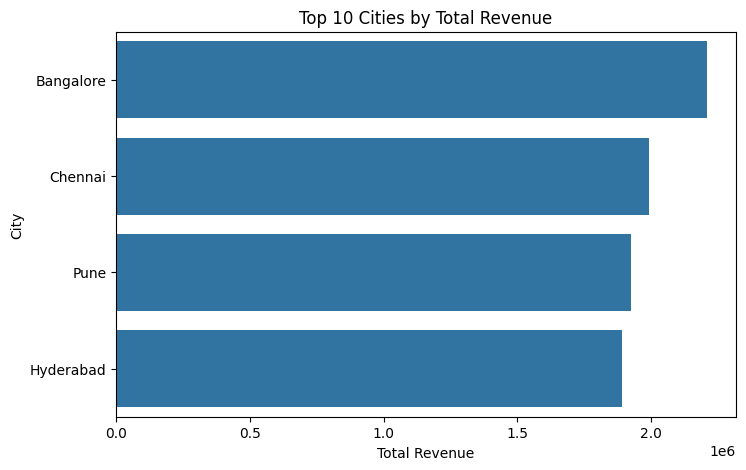

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

top_cities = final_df.groupby('city')['total_amount'] \
                     .sum() \
                     .sort_values(ascending=False) \
                     .head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_cities.values, y=top_cities.index)
plt.title("Top 10 Cities by Total Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("City")
plt.show()


Gold vs Regular – Order Count

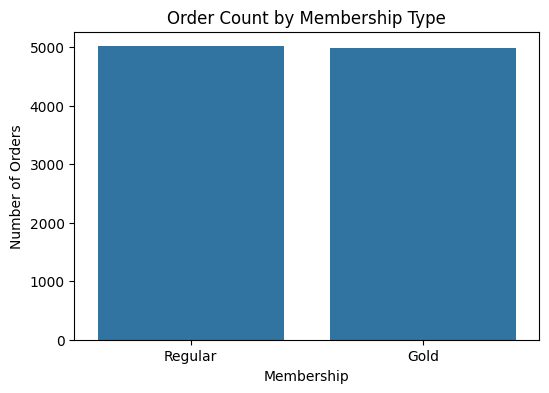

In [82]:
plt.figure(figsize=(6,4))
sns.countplot(x='membership', data=final_df)
plt.title("Order Count by Membership Type")
plt.xlabel("Membership")
plt.ylabel("Number of Orders")
plt.show()


Cuisine-wise Revenue

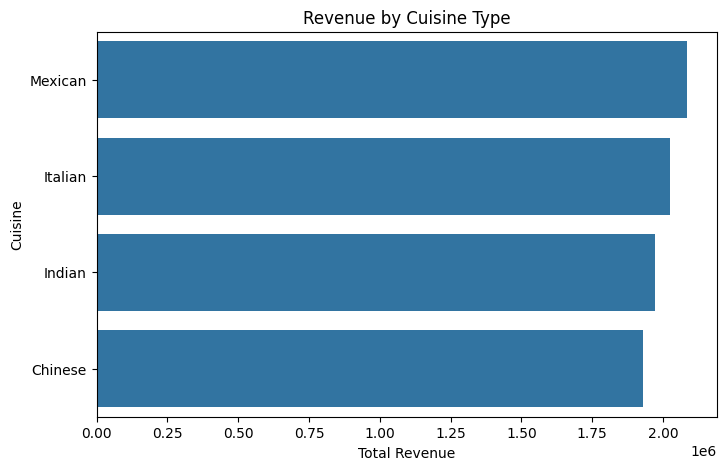

In [83]:
cuisine_revenue = final_df.groupby('cuisine')['total_amount'] \
                           .sum() \
                           .sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=cuisine_revenue.values, y=cuisine_revenue.index)
plt.title("Revenue by Cuisine Type")
plt.xlabel("Total Revenue")
plt.ylabel("Cuisine")
plt.show()


Rating vs Revenue (Relationship)

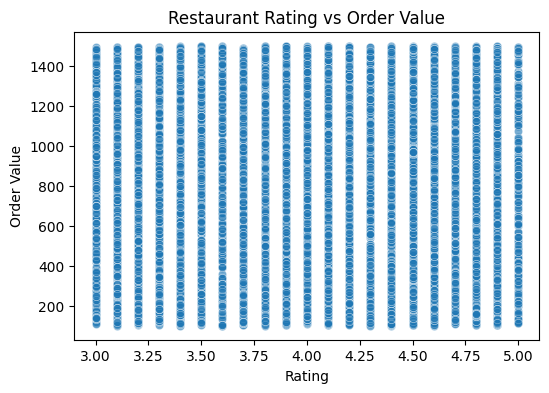

In [84]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x='rating',
    y='total_amount',
    data=final_df,
    alpha=0.6
)
plt.title("Restaurant Rating vs Order Value")
plt.xlabel("Rating")
plt.ylabel("Order Value")
plt.show()
